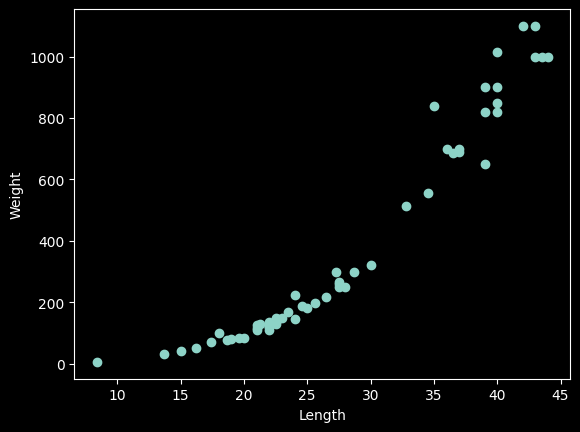

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Fish.csv')

perch_df = df[df['Species'] == 'Perch']

perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()

plt.scatter(perch_length,perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

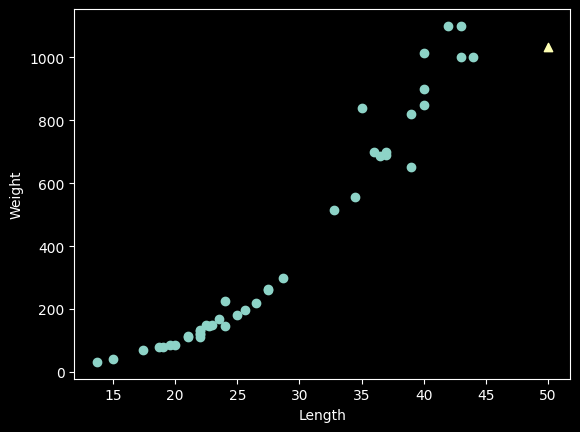

In [42]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length,perch_weight, random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

plt.scatter(train_input, train_target)
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

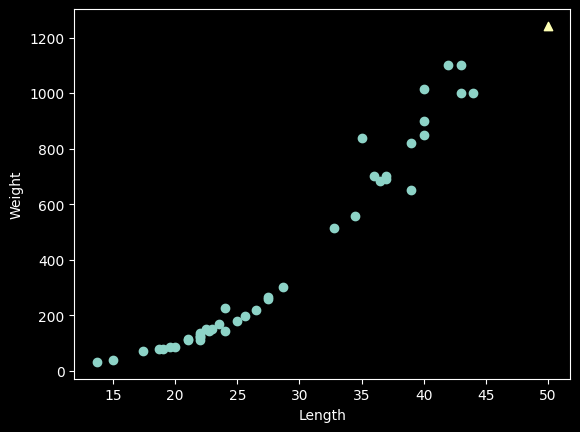

In [43]:
lr = LinearRegression()
lr.fit(train_input, train_target)

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

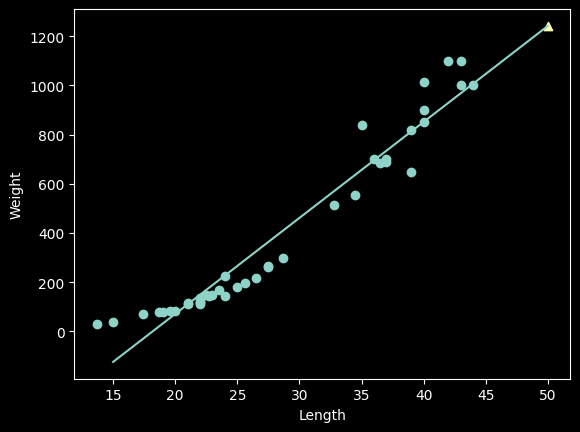

In [44]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [45]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


In [46]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr.fit(train_poly, train_target)

print(lr.predict([[50** 2, 50]]))

[1573.98423528]


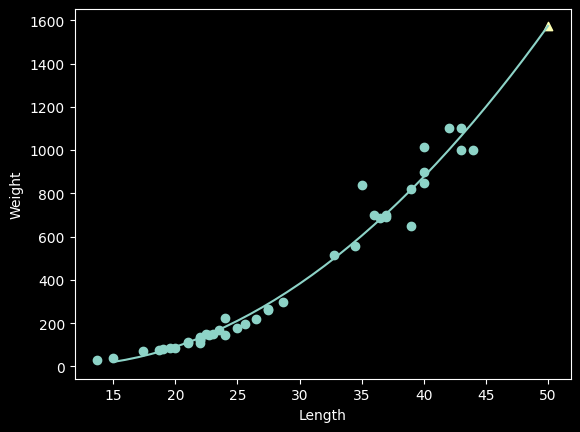

In [47]:
point = np.arange(15, 51)

plt.scatter(train_input, train_target)
plt.plot(point, point ** 2 * lr.coef_[0] + point * lr.coef_[1] + lr.intercept_)
plt.scatter(50, 1573.98423528, marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [49]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
